Pioglitazone scaffold

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 53.7 MB/s eta 0:00:00


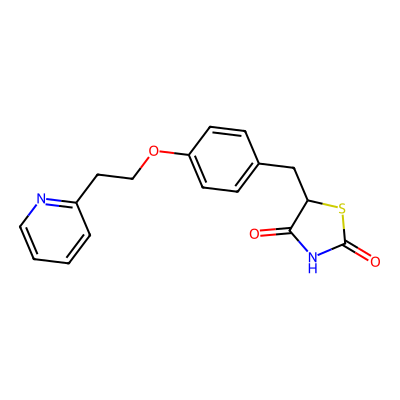

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold # Import the MurckoScaffold submodule

# Pioglitazone SMILES
pioglitazone_smiles = "CCC1=CN=C(CCOC2=CC=C(CC3SC(=O)NC3=O)C=C2)C=C1"

# Create an RDKit molecule object
mol = Chem.MolFromSmiles(pioglitazone_smiles)

# Generate the Murcko scaffold
scaffold = MurckoScaffold.GetScaffoldForMol(mol) # Use the correct function name

# Display the scaffold image with increased size
Draw.MolToImage(scaffold, size=(400, 400)) # Increased size

Finding Derivatives

Uploading file and extract necessary column

In [ ]:
import pandas as pd
df = pd.read_csv("/content/PubChem pio 4829.tsv" , sep='\t')
df.head()

,Compound_CID,Name,Synonyms,Molecular_Weight,Molecular_Formula,Polar_Area,Complexity,XLogP,Heavy_Atom_Count,H-Bond_Donor_Count,...,Linked_PubChem_Patent_Count,Linked_PubChem_Patent_Family_Count,MeSH_Headings,Annotation_Content,Annotation_Type_Count,Linked_BioAssays,Create_Date,Data_Source,Data_Source_Category,Tagged_by_PubChem
0,4829,Pioglitazone,Pioglitazone|111025-46-8|Glustin|Zactos|Piogli...,356.4,C19H20N2O3S,93.6,466,3.8,25,1,...,84289,15480,Pioglitazone,Biological Test Results|Interactions and Pathw...,17,880|1030|1457|1458|1460|1463|1468|1469|1471|14...,20050325,001Chemical|10X CHEM|3WAY PHARM INC|A2B Chem|A...,Chemical Vendors|Curation Efforts|Governmental...,C78276 - Agent Affecting Digestive System or M...
1,60560,Pioglitazone Hydrochloride,pioglitazone hydrochloride|112529-15-4|Pioglit...,392.9,C19H21ClN2O3S,93.6,466,NaN,26,2,...,12475,3116,Pioglitazone,Biological Test Results|Interactions and Pathw...,16,875|880|881|884|885|887|889|892|893|894|900|90...,20050624,001Chemical|10X CHEM|3WAY PHARM INC|A2B Chem|A...,Chemical Vendors|Curation Efforts|Governmental...,C78276 - Agent Affecting Digestive System or M...
2,4147757,Leriglitazone,Hydroxypioglitazone|146062-44-4|Leriglitazone|...,372.4,C19H20N2O4S,114.0,496,2.5,26,2,...,241,75,leriglitazone,Biological Test Results|Interactions and Pathw...,13,106695|1614504|1614505|1614506|1614507|1614508...,20050913,10X CHEM|1st Scientific|3WAY PHARM INC|A1 BioC...,Chemical Vendors|Curation Efforts|Governmental...,C78272 - Agent Affecting Nervous System
3,10429242,Mitoglitazone,Mitoglitazone|146062-49-9|MSDC-0160|MSD-9|CAY-...,370.4,C19H18N2O4S,111.0,534,3.5,26,1,...,880,194,MSDC-0160,Biological Test Results|Interactions and Pathw...,9,106695|1419241|1419242|1419243|1419244|1419245...,20061025,001Chemical|10X CHEM|1st Scientific|A2B Chem|A...,Chemical Vendors|Curation Efforts|Governmental...,NaN
4,10068721,Carboxy Pioglitazone (M-V),Carboxy Pioglitazone (M-V)|146062-48-8|Pioglit...,386.4,C19H18N2O5S,131.0,550,2.4,27,2,...,13,4,NaN,Biological Test Results|Classification|Literat...,6,106695,20061025,A1 BioChem Labs|A2B Chem|AA BLOCKS|Ambinter|Be...,Chemical Vendors|Curation Efforts|Governmental...,NaN


In [ ]:
# Select the required columns
rosi_cid_smiles_df = df[['Compound_CID', 'SMILES']]

# Save the selected columns to a new TSV file
rosi_cid_smiles_df.to_csv('pio cid and smiles.tsv', sep='\t', index=False)

print("Successfully extracted 'Compound_CID', and 'SMILES' and saved to 'pio cid and smiles.tsv'")

Successfully extracted 'Compound_CID', and 'SMILES' and saved to 'pio cid and smiles.tsv'


In [ ]:
df=pd.read_csv("/content/pio cid and smiles.tsv" , sep="\t")
df

,Compound_CID,SMILES
0,4829,CCC1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC(=O)S3
1,60560,CCC1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC(=O)S...
2,4147757,CC(C1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC(=O)...
3,10429242,CCC1=CN=C(C=C1)C(=O)COC2=CC=C(C=C2)CC3C(=O)NC(...
4,10068721,C1=CC(=CC=C1CC2C(=O)NC(=O)S2)OCCC3=NC=C(C=C3)C...
...,...,...
1269,176521931,CCC1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC(=O)S...
1270,176522326,CCC1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC(=O)S...
1271,176524001,CCC1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC(=C=S)S3
1272,176525886,[HH].CCC1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC...


Converting Smile to canonical smile

In [ ]:
from rdkit import Chem
import pandas as pd

def to_canonical_smiles(smiles):
    """Converts a SMILES string to its canonical form using RDKit."""
    if pd.isna(smiles):
        return None
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.MolToSmiles(mol, canonical=True)
    return None

# Load the dataframe
rosi_cid_smiles_df = pd.read_csv("/content/pio cid and smiles.tsv" , sep="\t")

# Apply the function to the 'SMILES' column to convert to canonical SMILES
rosi_cid_smiles_df['SMILES'] = rosi_cid_smiles_df['SMILES'].apply(to_canonical_smiles)

# Save the updated DataFrame back to the original TSV file, keeping the header and using tab separation
rosi_cid_smiles_df.to_csv('/content/pio cid and smiles.tsv', sep='\t', index=False, header=True)

print("Successfully converted SMILES to canonical form and saved to '/content/pio cid and smiles.tsv'")

[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors


Successfully converted SMILES to canonical form and saved to '/content/pio cid and smiles.tsv'


[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not removing hydrogen atom without neighbors
[08:29:58] WARNING: not r

In [ ]:
display(rosi_cid_smiles_df)

,Compound_CID,SMILES
0,4829,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
1,60560,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.Cl
2,4147757,CC(O)c1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
3,10429242,CCc1ccc(C(=O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1
4,10068721,O=C(O)Cc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
...,...,...
1269,176521931,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.CN(C)C...
1270,176522326,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.CN(C)C...
1271,176524001,CCc1ccc(CCOc2ccc(CC3SC(=C=S)NC3=O)cc2)nc1
1272,176525886,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.CNCC(N...


Murcko Scaffold to find derivatives

In [ ]:
import pandas as pd

# Load the data from the TSV file into a pandas DataFrame
rosi_df = pd.read_csv("/content/pio cid and smiles.tsv", sep="\t")

# Display the first few rows of the DataFrame to confirm successful loading
display(rosi_df.head())

,Compound_CID,SMILES
0,4829,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
1,60560,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.Cl
2,4147757,CC(O)c1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
3,10429242,CCc1ccc(C(=O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1
4,10068721,O=C(O)Cc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1


In [ ]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import pandas as pd # Import pandas

# Pioglitazone SMILES (assuming you have this defined)
pioglitazone_smiles = "CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1"

# Create RDKit molecule object for Pioglitazone
pioglitazone_mol = Chem.MolFromSmiles(pioglitazone_smiles)

# Generate Murcko scaffold for Pioglitazone
pioglitazone_scaffold = MurckoScaffold.GetScaffoldForMol(pioglitazone_mol)
pioglitazone_scaffold_smiles = Chem.MolToSmiles(pioglitazone_scaffold, canonical=True)

print(f"Pioglitazone Scaffold SMILES: {pioglitazone_scaffold_smiles}")

# Now, let's apply this to the DataFrame to find molecules with the same scaffold
def get_murcko_scaffold_smiles(smiles):
    """Generates canonical Murcko scaffold SMILES for a given SMILES string."""
    if pd.isna(smiles):
        return None
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        if scaffold is not None:
            return Chem.MolToSmiles(scaffold, canonical=True)
    return None

# Select only 'Compound_CID' and 'SMILES' from the original DataFrame
derivatives_df = rosi_df[['Compound_CID', 'SMILES']].copy()

# Apply the function to the 'SMILES' column to get the scaffold SMILES for each molecule
derivatives_df['Scaffold_SMILES'] = derivatives_df['SMILES'].apply(get_murcko_scaffold_smiles)

# Identify derivatives by comparing their scaffold SMILES to the pioglitazone scaffold SMILES
derivatives_df = derivatives_df[derivatives_df['Scaffold_SMILES'] == pioglitazone_scaffold_smiles]

# Display only the 'Compound_CID' and 'SMILES' columns for the derivatives
display(derivatives_df[['Compound_CID', 'SMILES']].head())

# Count the number of derivatives
num_derivatives = len(derivatives_df)
print(f"\nNumber of derivatives found: {num_derivatives}")

# Save the derivatives to a new TSV file, excluding the 'Scaffold_SMILES' column
derivatives_df.drop(columns=['Scaffold_SMILES']).to_csv('pio cid derivatives.tsv', sep='\t', index=False)


# print("\nSuccessfully saved 'pio cid derivatives.tsv'")

Pioglitazone Scaffold SMILES: O=C1NC(=O)C(Cc2ccc(OCCc3ccccn3)cc2)S1


[08:33:58] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not removing hydrogen atom without neighbors
[08:33:59] WARNING: not r

,Compound_CID,SMILES
0,4829,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
1,60560,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.Cl
2,4147757,CC(O)c1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
4,10068721,O=C(O)Cc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
7,23651402,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1



Number of derivatives found: 482


In [ ]:
df=pd.read_csv("/content/pio cid derivatives.tsv" , sep="\t")
df

,Compound_CID,SMILES
0,4829,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
1,60560,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.Cl
2,4147757,CC(O)c1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
3,10068721,O=C(O)Cc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1
4,23651402,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1
...,...,...
477,176520682,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.CN(C)/...
478,176521931,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.CN(C)C...
479,176522326,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.CN(C)C...
480,176525886,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.CNCC(N...


Tanimoto Similarity

Tanimoto Similarity

In [ ]:
# calculating tanimoto similarity for 482 compounds
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator, DataStructs
# Step 1:
# Load dataset - has chembl id, smiles, EC50
compounds_df = pd.read_csv("/content/pio cid derivatives.tsv", sep="\t")

# Load datset - pio and rosi as reference compound for calculating tanimoto
ref_df = pd.read_csv("/content/rosi and pio smiles.tsv", sep="\t")


# Step 2: Setup Morgan generator
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

def smiles_to_fp(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return morgan_gen.GetFingerprint(mol)
    else:
        return None

# Step 3: Get reference compounds
rosi_smiles = ref_df.loc[ref_df["Generic name"].str.contains("Rosi", case=False), "Smiles"].values[0]
pio_smiles  = ref_df.loc[ref_df["Generic name"].str.contains("Pio", case=False), "Smiles"].values[0]

rosi_fp = smiles_to_fp(rosi_smiles)
pio_fp  = smiles_to_fp(pio_smiles)

# Step 4: Compute tanimoto similarities
rosi_sims = []
pio_sims = []

for smi in compounds_df["SMILES"]:
    fp = smiles_to_fp(smi)
    if fp:
        rosi_sims.append(round(DataStructs.TanimotoSimilarity(rosi_fp, fp),4))
        pio_sims.append(round(DataStructs.TanimotoSimilarity(pio_fp, fp),4))
    else:
        rosi_sims.append(None)
        pio_sims.append(None)

compounds_df["Tanimoto_with_Rosi"] = rosi_sims
compounds_df["Tanimoto_with_Pio"]  = pio_sims


# Step 5: doing Average similarity to filter compounds

compounds_df["Average_Similarity"] = (
    compounds_df["Tanimoto_with_Rosi"] + compounds_df["Tanimoto_with_Pio"]
) / 2
compounds_df["Average_Similarity"] = compounds_df["Average_Similarity"].round(4)


# Step 6: Save results

output_file = "/content/pio cid derivatives.tsv"
compounds_df.to_csv(output_file, sep="\t", index=False)

print("✅ Done! Results saved to:", output_file)
compounds_df.head()

[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not removing hydrogen atom without neighbors
[08:37:26] WARNING: not r

✅ Done! Results saved to: /content/pio cid derivatives.tsv


[08:37:26] WARNING: not removing hydrogen atom without neighbors


,Compound_CID,SMILES,Tanimoto_with_Rosi,Tanimoto_with_Pio,Average_Similarity
0,4829,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,0.5246,1.0000,0.7623
1,60560,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1.Cl,0.5161,0.9783,0.7472
2,4147757,CC(O)c1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,0.4923,0.7407,0.6165
3,10068721,O=C(O)Cc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,0.4844,0.7692,0.6268
4,23651402,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,0.4769,0.6607,0.5688


In [ ]:
# fixing Threshold value of rosi and pio tanimoto sim score
threshold = 0.5245

# Count how many compounds pass
count_above = (compounds_df['Average_Similarity']>= threshold).sum()


# Total compounds
total_compounds = len(compounds_df)

# Print results
print(f"Compounds with Average_Similarity >= {threshold}: {count_above}")

Compounds with Average_Similarity >= 0.5245: 179


In [ ]:
# save filtered compounds
filtered_df = compounds_df[compounds_df["Average_Similarity"] >= threshold]
filtered_df.to_csv("/content/pio derivatives threshold.tsv", sep="\t", index=False)

print("Filtered compounds saved to: /content/pio derivatives threshold.tsv")

Filtered compounds saved to: /content/pio derivatives threshold.tsv
